# Finding Latitude and Longitude with Python

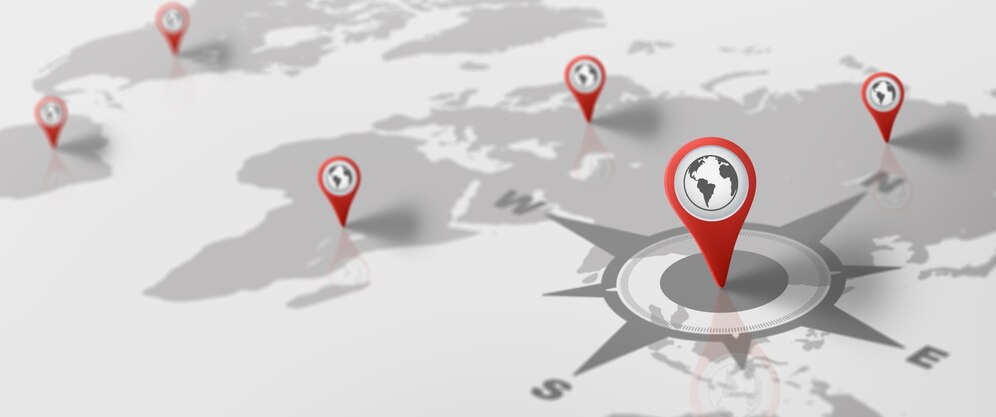

In [1]:
#pip install geopy

In [2]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
import warnings 
warnings.filterwarnings('ignore')

In [3]:
cities = pd.read_csv('CityIL.csv')

In [4]:
cities.head()

,Location,Latitude,Longitude
0,"Tzohar, Israel",NaN,NaN
1,"Mivtachim, Israel",NaN,NaN
2,"Reim, Israel",NaN,NaN
3,"Talmei Yaffe, Israel",NaN,NaN
4,"Ge'a, Israel",NaN,NaN


In [5]:
cities.Location

0            Tzohar, Israel
1         Mivtachim, Israel
2              Reim, Israel
3      Talmei Yaffe, Israel
4              Ge'a, Israel
              ...          
95        Gan Yavne, Israel
96      Gan HaDarom, Israel
97      Maon Tzofia, Israel
98    Kerem BeYavne, Israel
99         Bitzaron, Israel
Name: Location, Length: 100, dtype: object

In [6]:
#Testing Geopy function
city ="London"
country ="Uk"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 51.5073219 
longtitude is:- -0.1276474


In [7]:
#Testing with known cities
city ="Tel Aviv"
country ="Israel"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 32.0852997 
longtitude is:- 34.7818064


In [8]:
#Testing with unknown cities
city ="Tzohar"
country ="Israel"
loc = geolocator.geocode(city+','+ country)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 31.2360988 
longtitude is:- 34.4270729


In [9]:
loc = geolocator.geocode("Bitzaron, Israel")
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 32.0698569 
longtitude is:- 34.7966382


In [10]:
geolocator.geocode("Bitzaron, Israel").latitude

32.0698569

In [11]:
geolocator.geocode(cities['Location'][99]).latitude

32.0698569

In [12]:
# creating new values to latitude and longitude for each city - take some time

ok=0
not_found=0
for l in range(0, len(cities.Location)):
    
    try:
        cities['Latitude'][l]= geolocator.geocode(cities['Location'][l]).latitude
        cities['Longitude'][l]= geolocator.geocode(cities['Location'][l]).longitude
        ok+= 1
    except:
        cities['Latitude'][l]= None
        cities['Longitude'][l]= None
        not_found += 1
print(ok,'ok', not_found, "not found")
        
 # I had to add a try-except to avoid errors in case the city was not found       

86 ok 14 not found


In [13]:
cities.head(15)

,Location,Latitude,Longitude
0,"Tzohar, Israel",31.236099,34.427073
1,"Mivtachim, Israel",31.240474,34.408297
2,"Reim, Israel",31.384804,34.458590
3,"Talmei Yaffe, Israel",31.616858,34.613289
4,"Ge'a, Israel",NaN,NaN
5,"Atar Dudaim, Israel",NaN,NaN
6,"Yated, Israel",31.206648,34.324936
7,"Sdeh Avraham, Israel",NaN,NaN
8,"Nir Itzhak, Israel",NaN,NaN
9,"Pri Gan, Israel",31.222855,34.352875


In [14]:
# Saving the file as a new csv

cities.to_csv(r'new_cities2.csv')

In [15]:
#Finding how many missing coordinates

cities.Latitude.isnull().sum()


14

In [16]:
#Checking manually the spelling for the missing values 
# and copying lat and long into the new csv

loc = geolocator.geocode("Sde Nitzan, Israel")
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 31.2284956 
longtitude is:- 34.4174077


## Check [here](#) the Tableau visualization where this data was used to create an animated graph

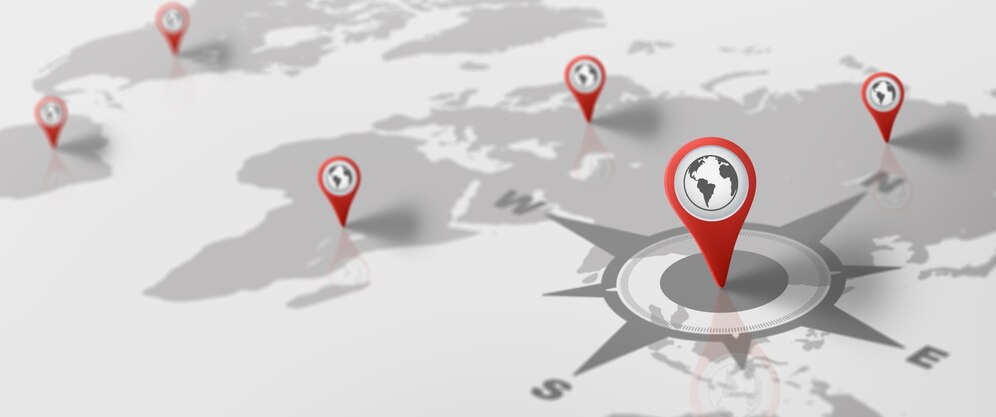